In [51]:
import numpy as np
import pandas as pd
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [52]:
#Load file data as a dataframe
filename = 'Drug DATASET.xlsx'
dataset = pd.read_excel(filename)
dataset.head()

#Seperating features and classes
array = dataset.values
X = array[:,0:13]
Y = array[:,13:]

In [53]:
#Task 1
DrugClass = []
def checkDrug(y):
    if(np.any("CL3" == y) or np.any("CL4" == y) or np.any("CL5" == y) or np.any("CL6" == y)):
        DrugClass.append("USER")
    else:
        DrugClass.append("NOUSER")
        
np.apply_along_axis(checkDrug,axis=1,arr=Y)
dataset["DrugClass"]=DrugClass
dataset.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Semer,VSA,DrugClass
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,NOUSER
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL0,CL0,USER
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,NOUSER
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL0,CL0,USER
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL0,CL0,NOUSER


In [54]:
#Data split in Train (70%) and Test (30%)
array = dataset.values
X = array[:,0:13]
Class = array[:,-1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Class, test_size=0.3, shuffle=True)


Accuracy = 75.44%


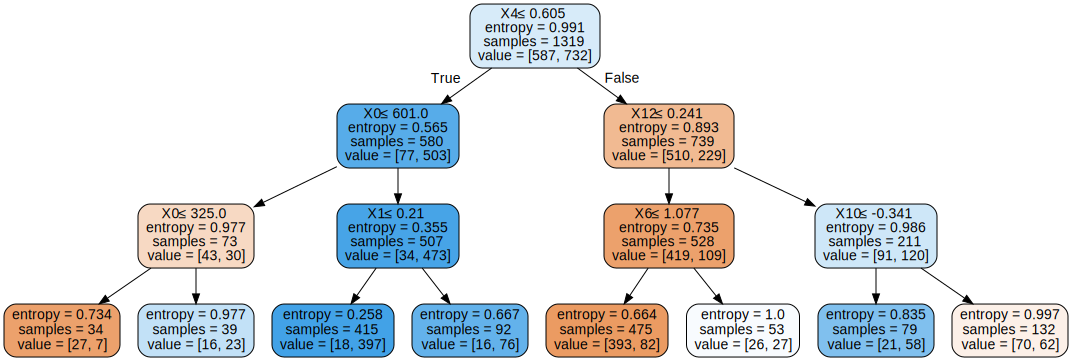

In [55]:
#Task2 (Decision Tree, with Entropy)
DTC_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=3, min_samples_leaf=5)
DTC_entropy.fit(X_train, Y_train)

DTC_pred = DTC_entropy.predict(X_test)
accuracy = accuracy_score(Y_test,DTC_pred)*100
print("Accuracy = {}%".format(round(accuracy,2)))

dot_data = tree.export_graphviz(DTC_entropy, out_file=None,  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(dot_data) 
graph

In [56]:
#Task3
GNB = GaussianNB()
GNB.fit(X_train, Y_train)
GNB_pred = GNB.predict(X_test)
accuracy = accuracy_score(Y_test,GNB_pred)*100
print("Accuracy = {}%".format(round(accuracy,2)))

Accuracy = 80.21%


In [57]:
#Task5
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train, Y_train)
KNN_pred = KNN.predict(X_test)
accuracy = accuracy_score(Y_test,KNN_pred)*100
print("Accuracy = {}%".format(round(accuracy,2)))

Accuracy = 73.5%


In [58]:
#Task6
RFC = RandomForestClassifier(max_depth=2, random_state=0)
RFC.fit(X_train, Y_train)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
print(RFC.feature_importances_)

RFC_pred = RFC.predict(X_test)
accuracy = accuracy_score(Y_test,RFC_pred)*100
print("Accuracy = {}%".format(round(accuracy,2)))

[0.0072365  0.11011992 0.         0.0999136  0.46907881 0.00090333
 0.02340658 0.00179121 0.01788694 0.         0.08522822 0.00464848
 0.17978641]
Accuracy = 77.92%


In [59]:
#Task4
print("Decision Tree: ")
DTC_pred = DTC_entropy.predict(X_test)
accuracy = accuracy_score(Y_test,DTC_pred)*100
print("Accuracy = {}%\n".format(round(accuracy,2)))
prec_score = precision_score(Y_test,DTC_pred,average=None)
print("Precision = {}\n".format(prec_score))
conf_matrix = confusion_matrix(Y_test,DTC_pred)
print("Confusion Matrix :\n {}\n".format(conf_matrix))
class_report = classification_report(Y_test,DTC_pred)
print("Classification Report:\n{}\n".format(class_report))

print("\n=========================\n")

print("Gausian Naive Bayes: ")
GNB_pred = GNB.predict(X_test)
accuracy = accuracy_score(Y_test,GNB_pred)*100
print("Accuracy = {}%\n".format(round(accuracy,2)))
prec_score = precision_score(Y_test,GNB_pred,average=None)
print("Precision = {}\n".format(prec_score))
conf_matrix = confusion_matrix(Y_test,GNB_pred)
print("Confusion Matrix :\n {}\n".format(conf_matrix))
class_report = classification_report(Y_test,GNB_pred)
print("Classification Report:\n{}\n".format(class_report))
print("\n=========================\n")

print("K-Nearest Neighbour (K=3): ")
KNN_pred = KNN.predict(X_test)
accuracy = accuracy_score(Y_test,KNN_pred)*100
print("Accuracy = {}%\n".format(round(accuracy,2)))
prec_score = precision_score(Y_test,KNN_pred,average=None)
print("Precision = {}\n".format(prec_score))
conf_matrix = confusion_matrix(Y_test,KNN_pred)
print("Confusion Matrix :\n {}\n".format(conf_matrix))
class_report = classification_report(Y_test,KNN_pred)
print("Classification Report:\n{}\n".format(class_report))
print("\n=========================\n")

print("Random Forest: ")
RFC_pred = RFC.predict(X_test)
accuracy = accuracy_score(Y_test,RFC_pred)*100
print("Accuracy = {}%\n".format(round(accuracy,2)))
prec_score = precision_score(Y_test,RFC_pred,average=None)
print("Precision = {}\n".format(prec_score))
conf_matrix = confusion_matrix(Y_test,RFC_pred)
print("Confusion Matrix :\n {}\n".format(conf_matrix))
class_report = classification_report(Y_test,RFC_pred)
print("Classification Report:\n{}\n".format(class_report))
print("\n=========================\n")

Decision Tree: 
Accuracy = 75.44%

Precision = [0.71923077 0.78431373]

Confusion Matrix :
 [[187  66]
 [ 73 240]]

Classification Report:
             precision    recall  f1-score   support

     NOUSER       0.72      0.74      0.73       253
       USER       0.78      0.77      0.78       313

avg / total       0.76      0.75      0.75       566




Gausian Naive Bayes: 
Accuracy = 80.21%

Precision = [0.76603774 0.83388704]

Confusion Matrix :
 [[203  50]
 [ 62 251]]

Classification Report:
             precision    recall  f1-score   support

     NOUSER       0.77      0.80      0.78       253
       USER       0.83      0.80      0.82       313

avg / total       0.80      0.80      0.80       566




K-Nearest Neighbour (K=3): 
Accuracy = 73.5%

Precision = [0.71548117 0.74923547]

Confusion Matrix :
 [[171  82]
 [ 68 245]]

Classification Report:
             precision    recall  f1-score   support

     NOUSER       0.72      0.68      0.70       253
       USER       0.75 